# Lathund plottning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import datetime
import sys

from sklearn.preprocessing import StandardScaler

In [2]:
# Normal distribution
y = [random.gauss(400, 50) for i in range(1,1001)]
y2 = [random.gauss(350, 70) for i in range(1,1001)]

# DataFrame from a dictionary.
d = {"y-value": y}
df = pd.DataFrame(data=d)
dfalt = pd.DataFrame(data={"y-value": y2})

In [3]:
# Stocks
def avk(a,b):
    ut = []
    s = 100
    for i in range(1,101):
        s *= (1+random.randint(a, b)/100)
        ut.append(s)
    return ut

# DataFrame from numpy ndarray:
df2 = pd.DataFrame(np.array([avk(0,2), avk(-1,3), avk(-3,6)])).T

In [4]:
d = {"ind": ["a","b","c"],
     "a": [1,2,3],
     "b": [2,3,4],
     "c": [3,4,5]
    }
df3 = pd.DataFrame(data=d)
df3.set_index('ind',drop=True,inplace=True)

In [5]:
# Practice data from seaborn

df4 = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

# Pandas

<function matplotlib.pyplot.show(close=None, block=None)>

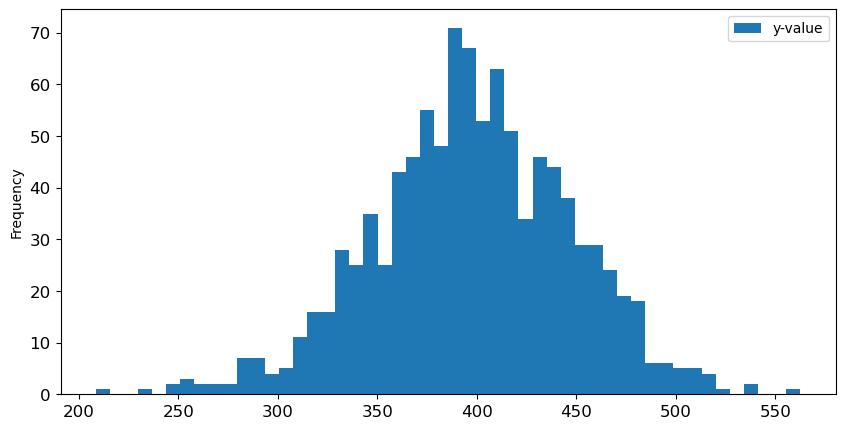

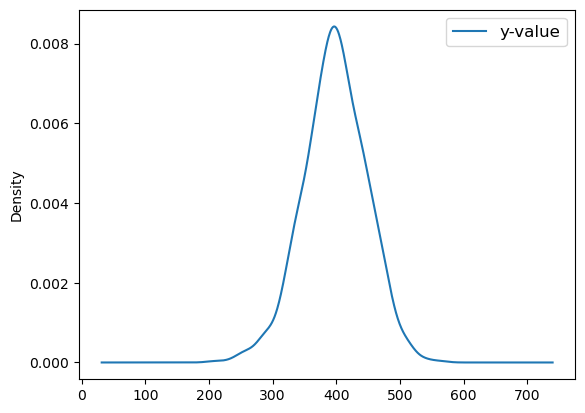

In [23]:
df.plot(figsize=[10,5],fontsize=12, kind="hist", bins=50)
df.plot(kind="density")
plt.legend(fontsize = 12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

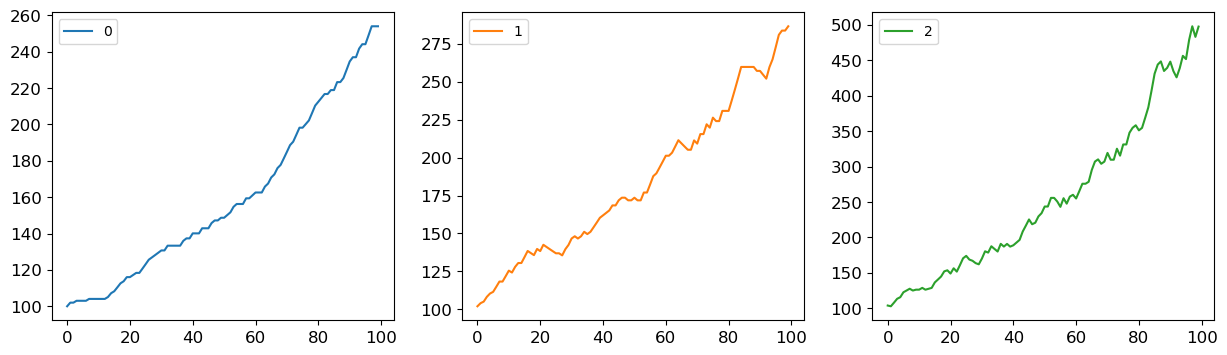

In [24]:
df2.plot(figsize=[15,4],fontsize=12, subplots=True, layout=(1,3),kind="line")
plt.show

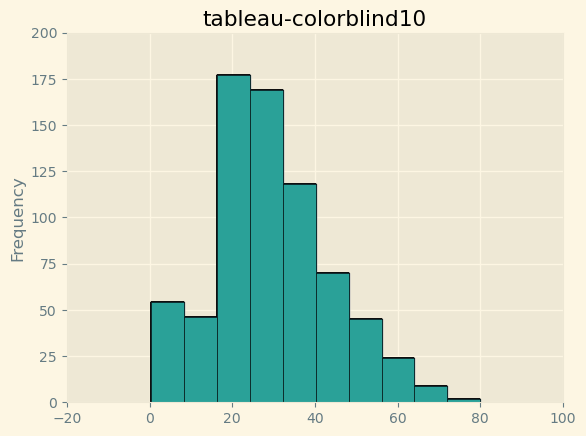

In [29]:
for i in plt.style.available:
    plt.style.use(i)
    df4.age.plot(kind="hist",title=i)
    plt.show
plt.style.use("default") # The style name of 'default' is reserved for the default style settings             

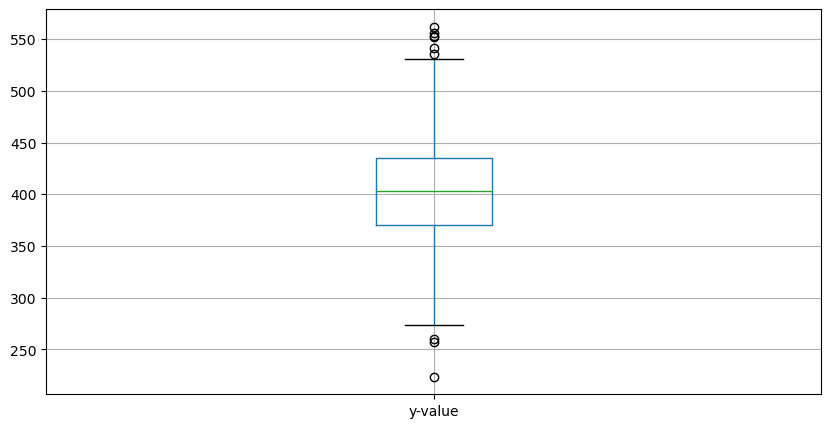

In [8]:
plt.figure(figsize=(10,5))
df.boxplot()

plt.show()

# Seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

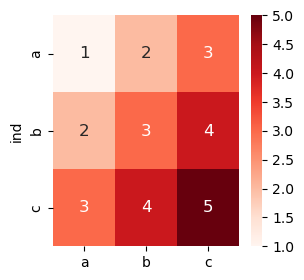

In [9]:
plt.figure(figsize=(3,3))
sns.heatmap(df3,cmap="Reds",annot=True,annot_kws={"size":12},)
plt.show

## Plotting with `series`

### `lmplot()`

In [11]:
# Plot data and regression model fits across a FacetGrid.
iris.columns
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

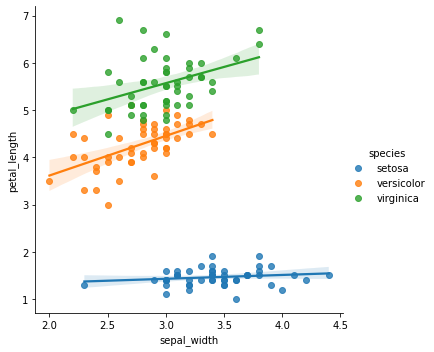

In [13]:
sns.lmplot(data=iris,x="sepal_width",y="petal_length",hue="species")
plt.show()

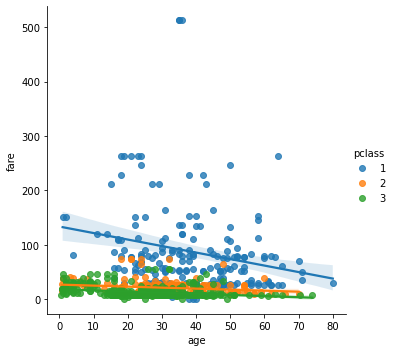

In [14]:
sns.lmplot(data=df4,x="age",y="fare",hue="pclass")

### `kdeplor()`

Plot univariate or bivariate distributions using kernel density estimation.

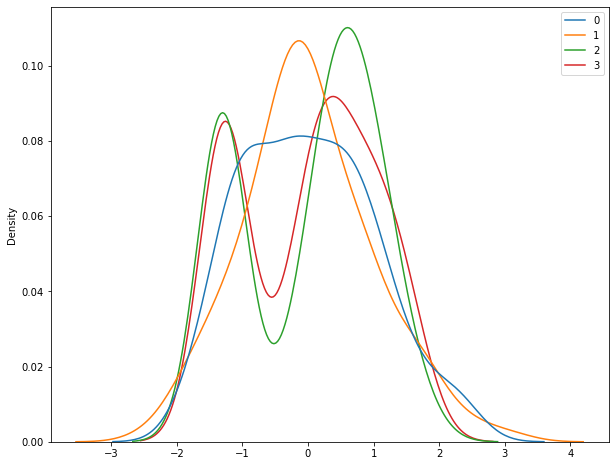

In [7]:
X = iris.select_dtypes("number")
scale = StandardScaler()

# Befor scaling 
plt.figure(figsize=(10,8))
sns.kdeplot(data= scale.fit_transform(X))
plt.show()

### `histplot()`

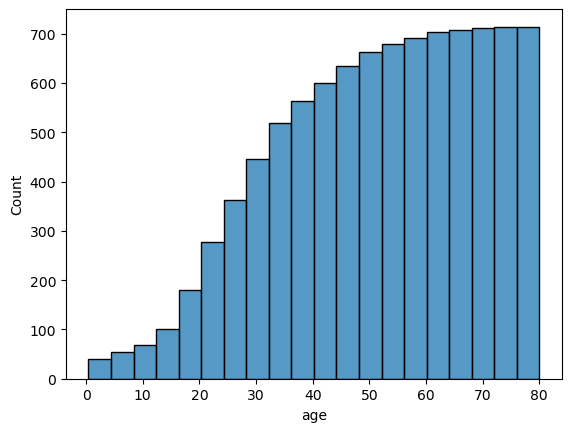

In [41]:
# Plotting series from DataFrame
sns.histplot(data = df4,x="age", cumulative=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

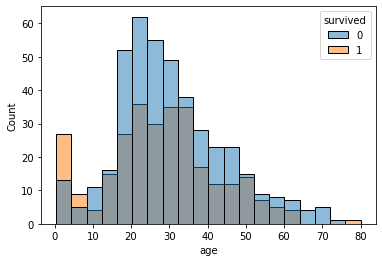

In [11]:
# Plotting series from DataFrame with hue (= groupby category)
sns.histplot(data = df4,x="age", hue="survived")

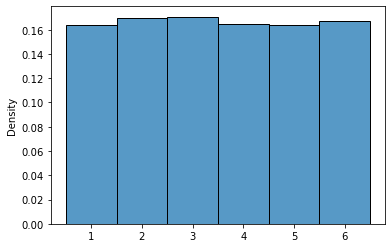

In [14]:
# For best result use discrete=True with discrete
t  = np.random.randint(1,7,10000)
sns.histplot(t,stat="density",discrete=True)
plt.show()

### `histplot()` with bar labels

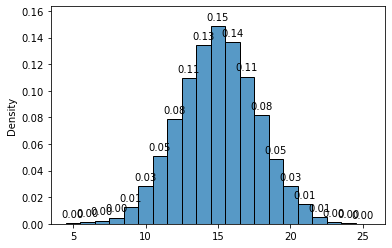

In [12]:
out = np.random.binomial(n=30,p=0.5,size=10000)
plot = sns.histplot(out,discrete=True,stat="density")

for p in plot.patches:
    if p.get_height != 0:
        plot.annotate(format(p.get_height(),".2f"),
                     (p.get_x() + p.get_width()/2, p.get_height()),
                     ha = "center",
                     va = "center",
                     xytext = (0,9),
                     textcoords = "offset points")
plt.margins(y=0.1)
plt.show()

### `countplot()` is like `value_counts()` for visualization

<AxesSubplot:xlabel='pclass', ylabel='count'>

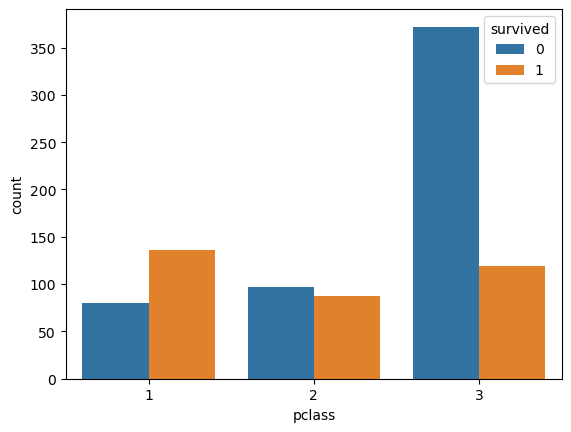

In [47]:
sns.countplot(data=df4,x="pclass",hue="survived")

### `boxplot()` and `swarmplot()`

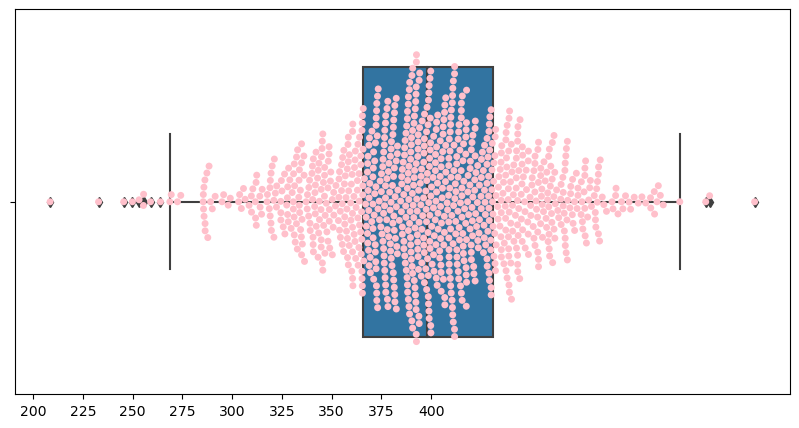

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x=yd,width=0.7)
plt.xticks(range(-100,401,25))
sns.swarmplot(x=yd,color="pink")
plt.show()

## Plotting with 2 columns

### `barplot()`

By default use `mean()` as aggregation function

<AxesSubplot:xlabel='pclass', ylabel='survived'>

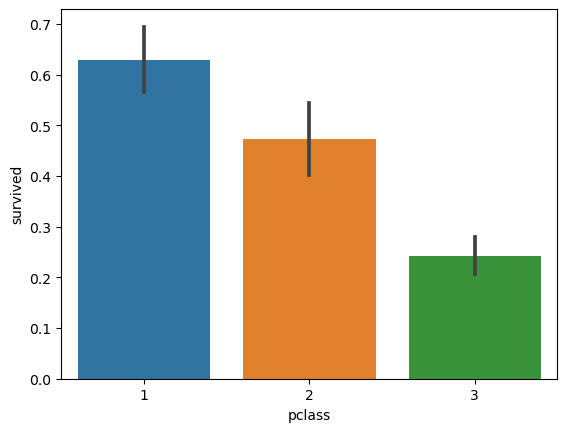

In [51]:
sns.barplot(data=df4,x="pclass",y="survived")

<AxesSubplot:xlabel='pclass', ylabel='survived'>

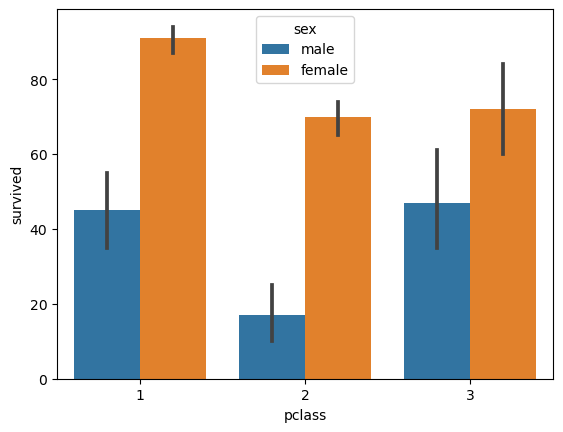

In [54]:
# Can cahnge the y-value estimator from mean (standard) to sum with estimator
sns.barplot(data=df4,x="pclass",y="survived",hue="sex",estimator=np.sum)

### `scatterplot()`

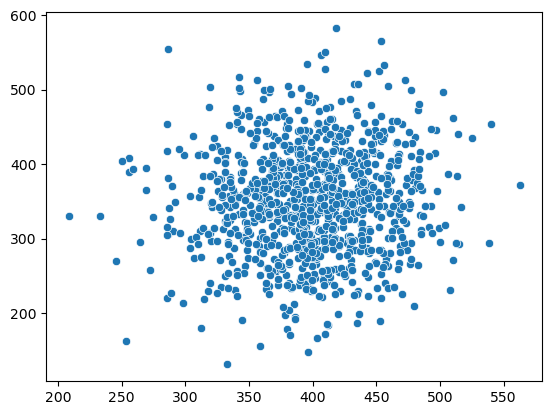

In [75]:
# With np array
xd = np.array(df["y-value"]) # Must use numpy array to access all functionality in seaborn plots
yd = np.array(dfalt["y-value"])

sns.scatterplot(x=xd,y=yd)
plt.show()

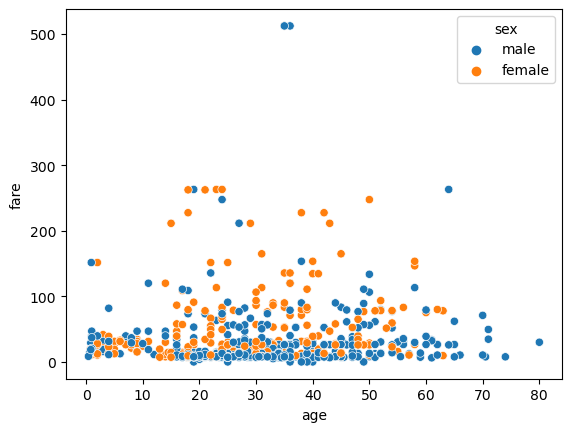

In [62]:
# With dataframe

sns.scatterplot(data=df4,x="age",y="fare",hue="sex")
plt.show()

### `relplot()`

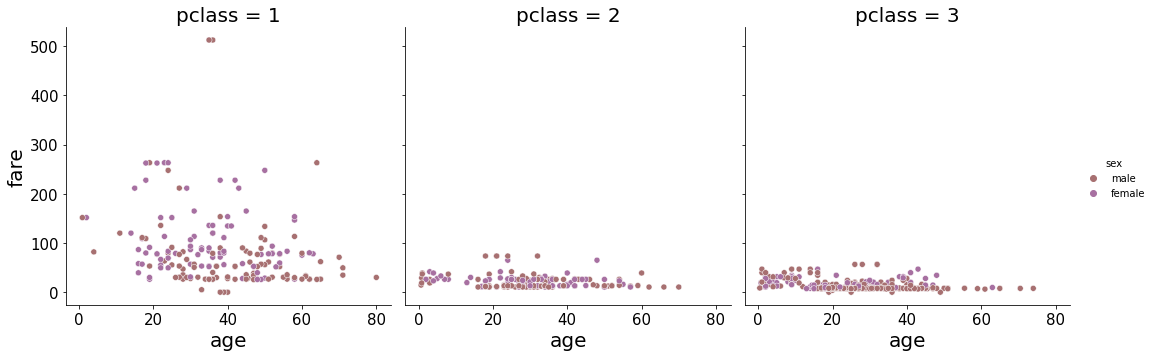

In [68]:
plt.rcParams["axes.labelsize"] = 20 # Gäller rubriker och axelrubriker för relplot()
g = sns.relplot(data=df4, x="age", y="fare", hue="sex", col="pclass",col_wrap=3)

for i in g.axes:
    i.tick_params(axis = 'both', which = 'major', labelsize = 15)
#    i.set_ylabel(i.yaxis.get_label_text(),fontsize=15)
plt.show()

## `heatmap()`

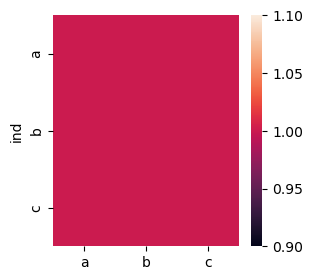

In [68]:
# Plot Nan-values in dataFrame
plt.figure(figsize=(3,3))
sns.heatmap(df3.notna())

plt.show()

In [32]:
corr = df4.corr()
matrix = np.triu(corr)

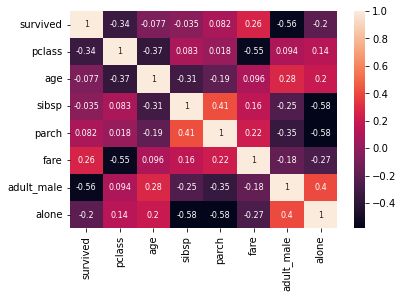

In [33]:
sns.heatmap(corr,annot=True,annot_kws={"size":8})
plt.show()

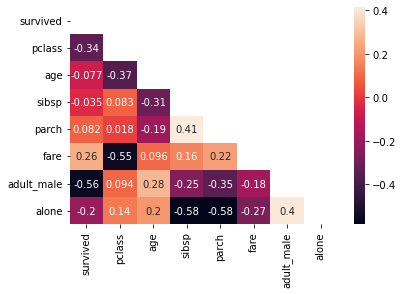

In [34]:
sns.heatmap(corr,annot=True,mask=matrix)
plt.show()

## `catplot()`

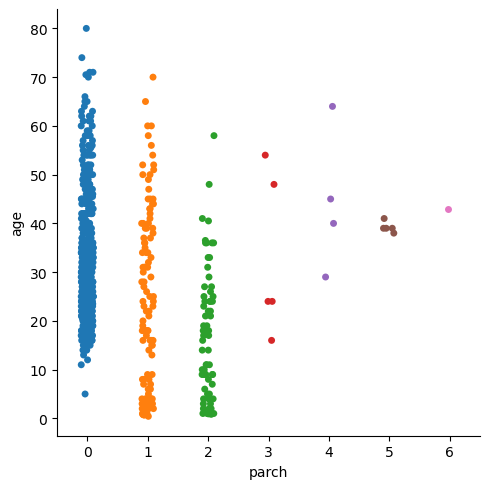

In [80]:
sns.catplot(data=df4,x="parch",y="age")
plt.show()

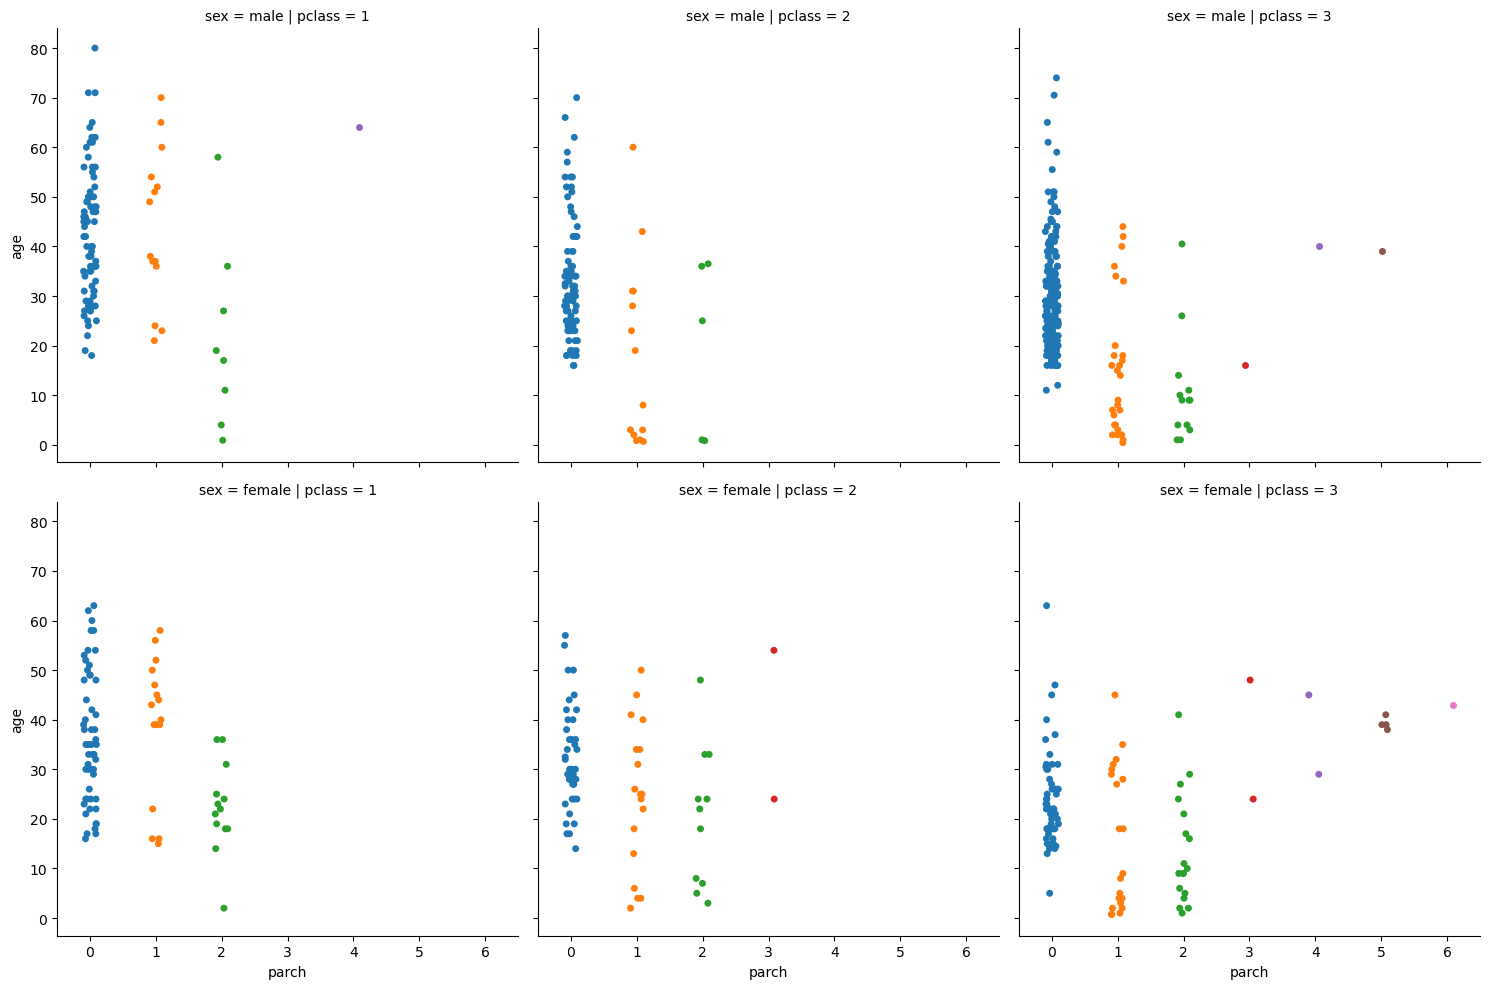

In [82]:
sns.catplot(data=df4,x="parch",y="age",row="sex",col="pclass")
plt.show()

## Exploratory plots

### `Pairplot()`

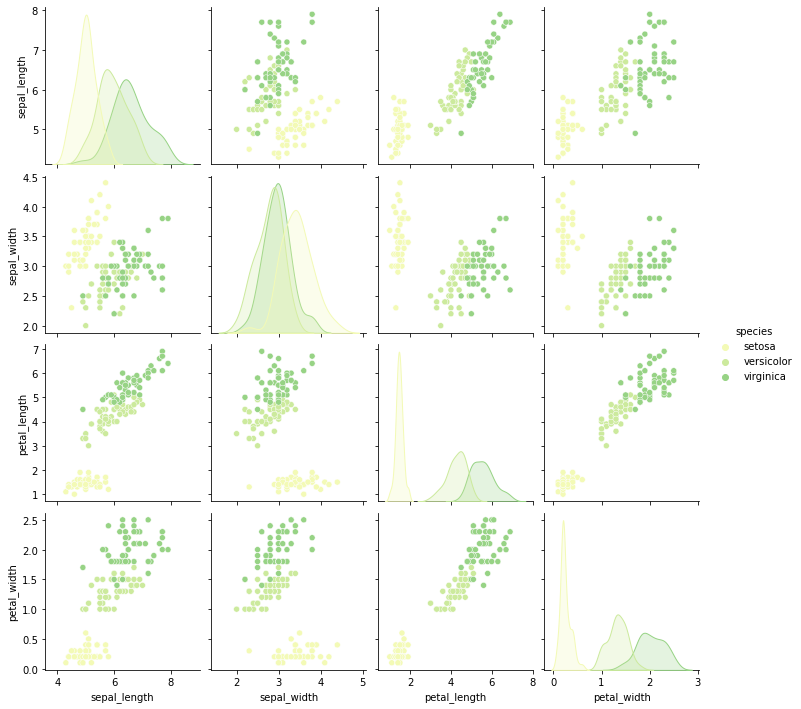

In [26]:
sns.pairplot(iris,hue="species")

## Multiple plots in one figure

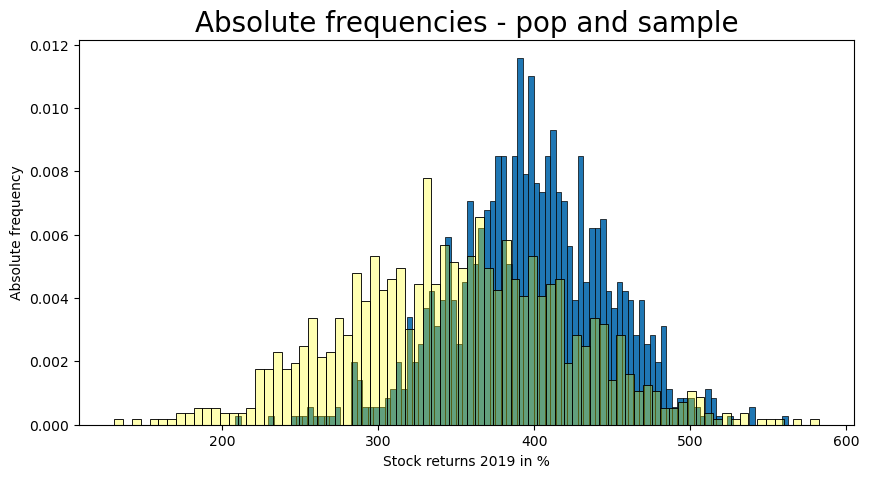

In [96]:
plt.figure(figsize=(10,5))

# With numpy array
yd = np.array(df["y-value"])
sns.histplot(yd,bins=100, stat="density",alpha = 1)

# With dataframe
sns.histplot(data=dfalt,x="y-value",bins=80,color="yellow",stat="density",alpha = 0.3)

plt.title("Absolute frequencies - pop and sample",fontsize = 20)
plt.xlabel("Stock returns 2019 in %")
plt.ylabel("Absolute frequency")
#plt.xticks(range(-100,401,25))
plt.show()

# seabornautomation

In [2]:
path = "C:/Users/ander/Documents/Handling/Kurs/Python/Eget/Bib/sebaut"
sys.path.append(path)

In [3]:
import seabornautomation as sa

In [6]:
num_feat, cont_feat, disc_feat, cat_feat = sa.create_feature_lists(df4)

In [7]:
num_feat

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

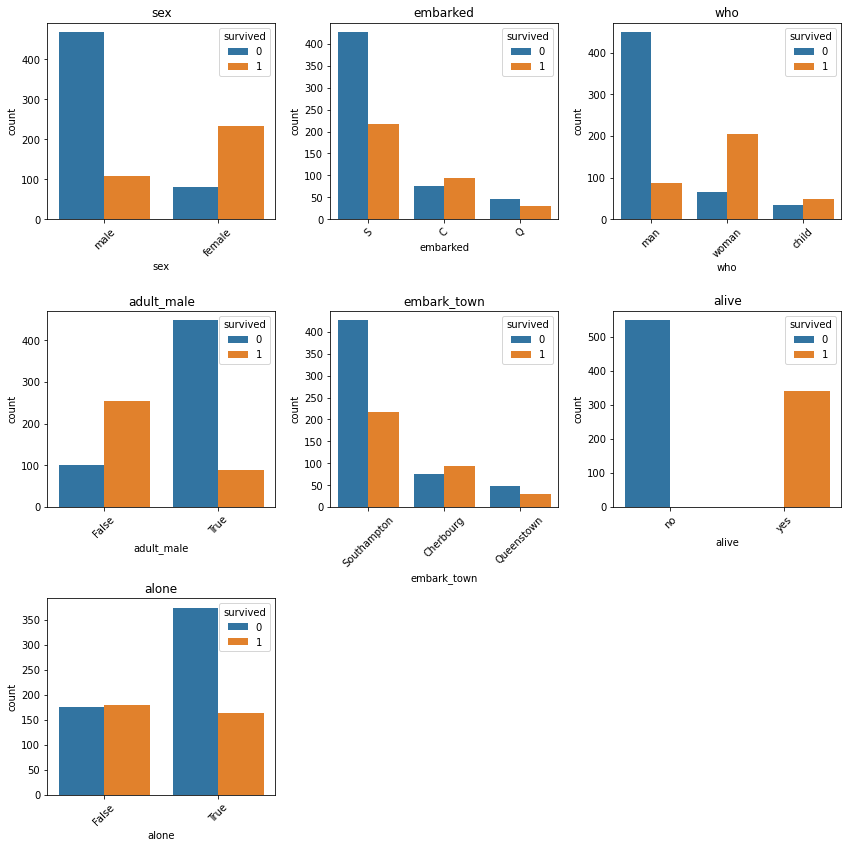

In [9]:
#sa.barplots(cat_feat,df4)
#sa.countplots(cat_feat,df4)
sa.countplots_by_target(cat_feat,df4,"survived")
#sa.countplots_by_target(cat_feat,df4,"pclass")
#sa.barplots(cat_feat,df4)
#sa.barplots_mean_target(cat_feat,df4,"pclass")
#sa.distplots(cont_feat,df4,kde=True)
#sa.scatterplots(num_feat,df4,"age")

# Customizing graph characteristics with `matplotlib`

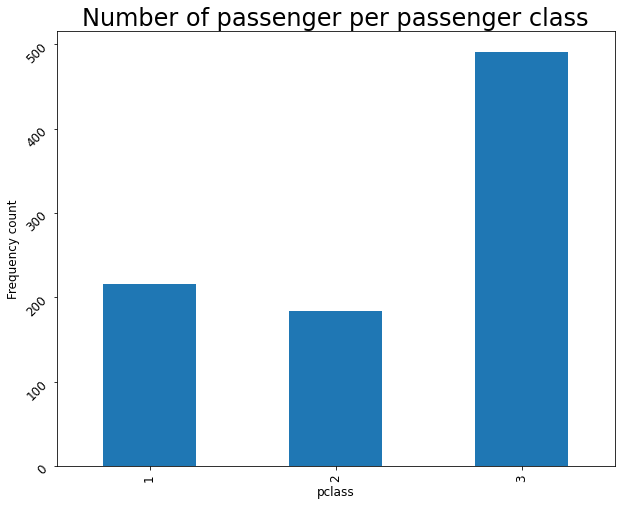

In [7]:
plt.figure(figsize=(10,8))
ax = df4.groupby("pclass").pclass.count().plot(kind="bar")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Frequency count", fontsize=12)
plt.xlabel(ax.xaxis.get_label_text(), fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=45)
plt.title("Number of passenger per passenger class", fontsize=24)
plt.show()

### Axis log scale

In [39]:
# ax.set(yscale="log") 

## `fig, ax` syntax

Info on axis methods: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html?highlight=set_title#matplotlib.axes.Axes.set_title

### 1x1 subplot

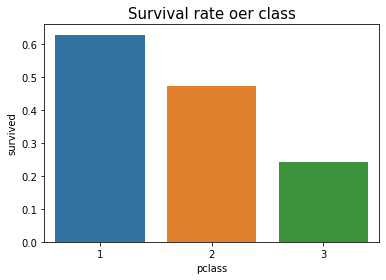

In [14]:
fig, ax = plt.subplots()
ax = sns.barplot(data=df4,x="pclass", y="survived",ci=None)
ax.set_title("Survival rate oer class",fontsize=15)

plt.show()

### 1x2 subplot

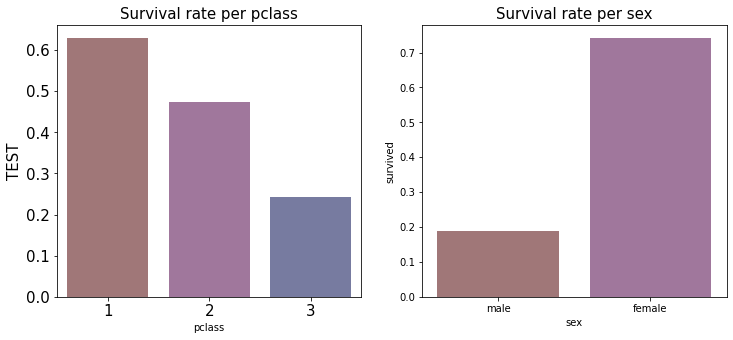

In [53]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.barplot(data=df4,x="pclass", y="survived",ci=None, ax=ax[0])
sns.barplot(data=df4,x="sex", y="survived",ci=None, ax=ax[1])

ax[0].set_title("Survival rate per pclass",fontsize=15)
ax[1].set_title("Survival rate per sex",fontsize=15)


#ax[0].legend(loc = "upper right", fontsize = 12, bbox_to_anchor = (1.25,1))
#ax[0].set_title("Rel alt mean\n", fontsize = 18)

ax[0].set_ylabel("TEST",fontsize=15)
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.show()

### n*n subplot

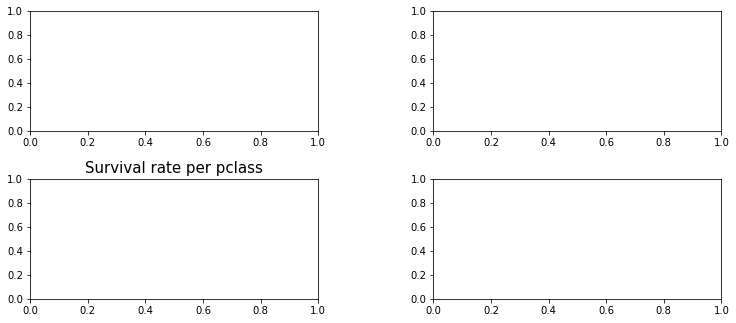

In [16]:
fig, ax = plt.subplots(2,2,figsize=(12,5))
ax[1][0].set_title("Survival rate per pclass",fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

# `seaborn` customization

## sns palette

In [49]:
snspalt = ["deep", "muted", "bright", "pastel", "dark", "colorblind"] # Seaborns own palettes

In [18]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [21]:
sns.set_palette("viridis")
sns.color_palette()

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [20]:
iris = sns.load_dataset("iris")

In [22]:
lst = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

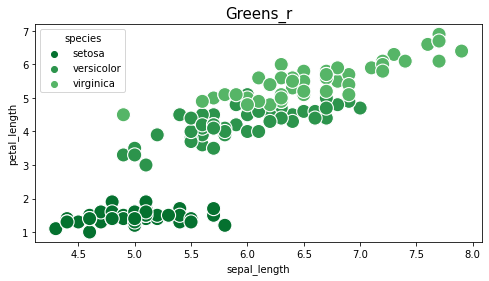

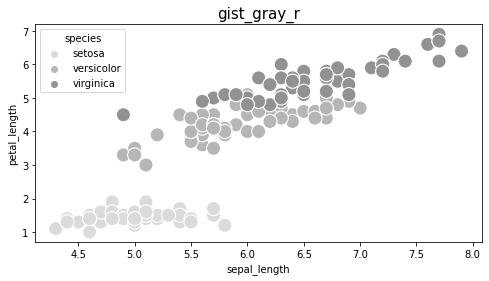

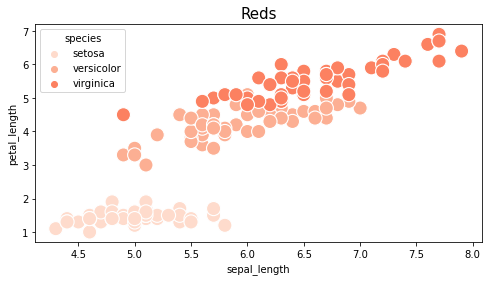

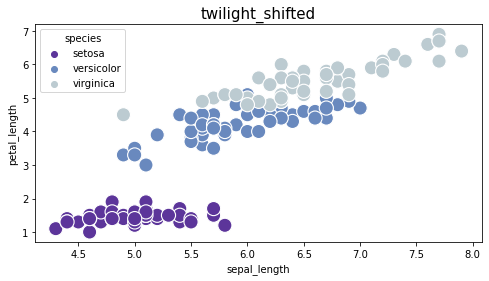

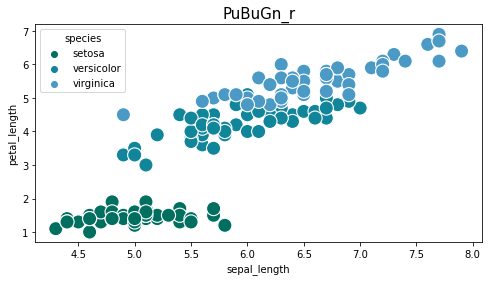

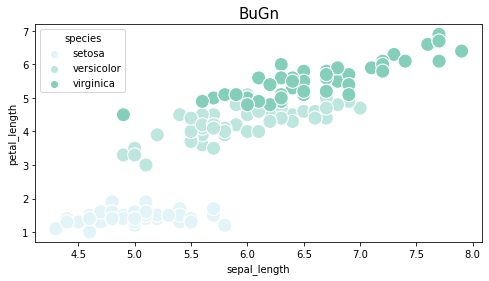

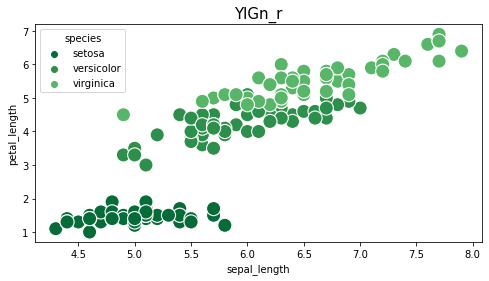

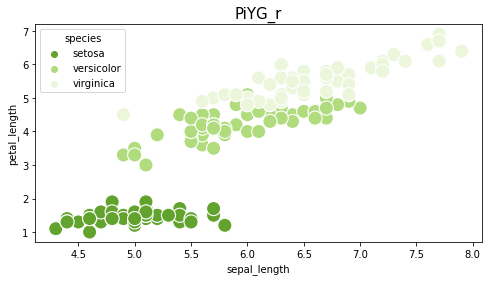

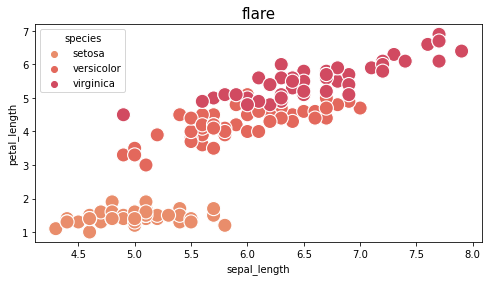

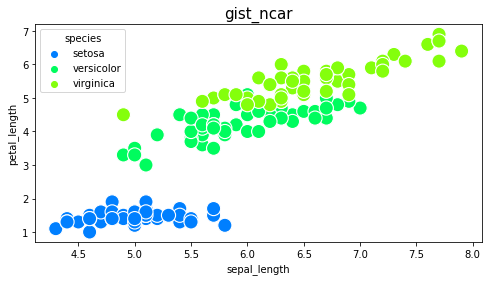

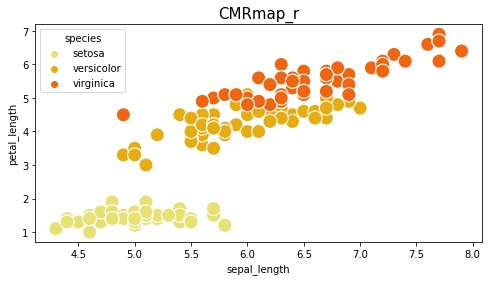

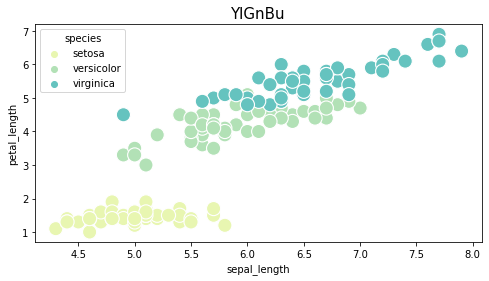

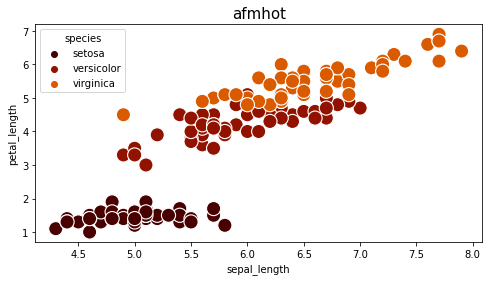

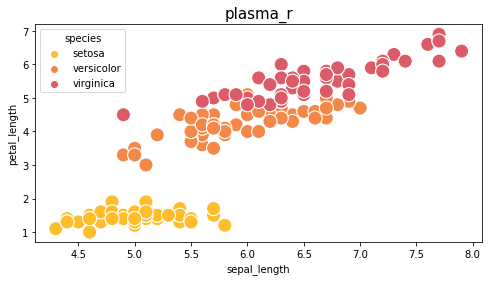

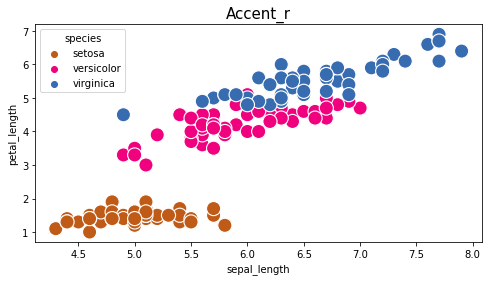

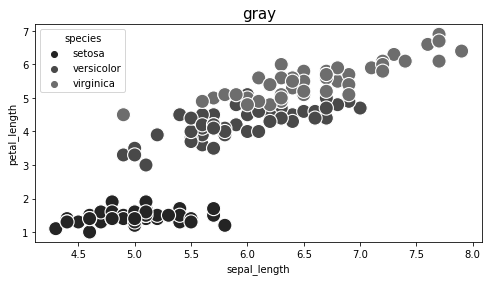

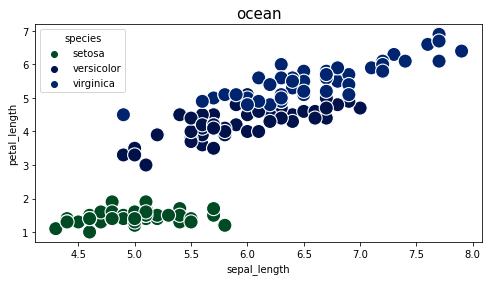

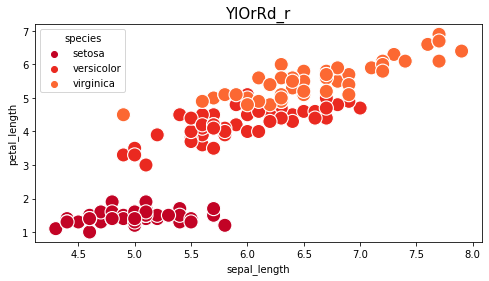

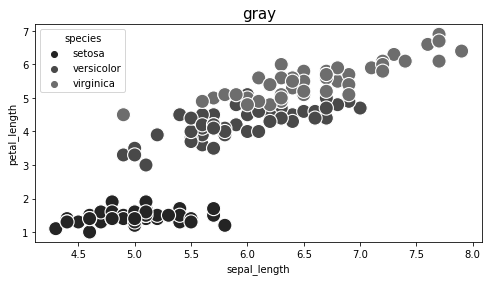

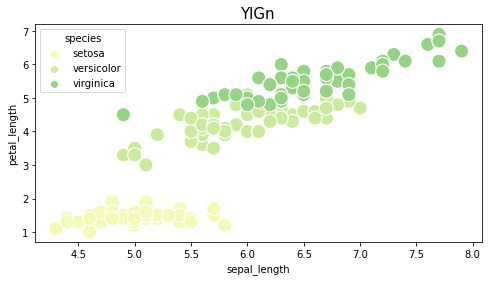

In [23]:
for i in range(20):
    palette = np.random.choice(lst)
    sns.set_palette(palette)
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=iris,x="sepal_length",y="petal_length",hue="species",s=200)
    plt.title(palette,fontsize=15)
    plt.show()

## Set custom color palette

Colorpicker: https://colors-picker.com/hex-color-picker/

In [42]:
colors=["#A77071","#A770A1","#7075A7","#70A797","#7AA770","#A7A270"]
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

[(0.6549019607843137, 0.4392156862745098, 0.44313725490196076),
 (0.6549019607843137, 0.4392156862745098, 0.6313725490196078),
 (0.4392156862745098, 0.4588235294117647, 0.6549019607843137),
 (0.4392156862745098, 0.6549019607843137, 0.592156862745098),
 (0.47843137254901963, 0.6549019607843137, 0.4392156862745098),
 (0.6549019607843137, 0.6352941176470588, 0.4392156862745098)]

## Set font

In [45]:
from matplotlib import rcParams
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()

In [46]:
rcParams["font.family"]
# Outputs 'sans-serif'

['sans-serif']

In [47]:
rcParams["font.family"] = "sans-serif" # Set font family

In [48]:
[i for i in fpaths if "comic" in i.lower()] # Checks list for fonts containing "comic"

['C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\comic.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\comicz.ttf']

# Export

## Save figure with transparent background

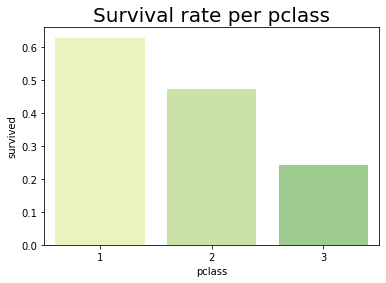

In [36]:
sns.barplot(data = df4, x = "pclass", y = "survived", ci = None)
plt.title("Survival rate per pclass", fontsize = 20)

# TO SAVE FIGURE
plt.savefig("filename.png",transparent=True)

plt.show()

# Automation

## Multiple plots

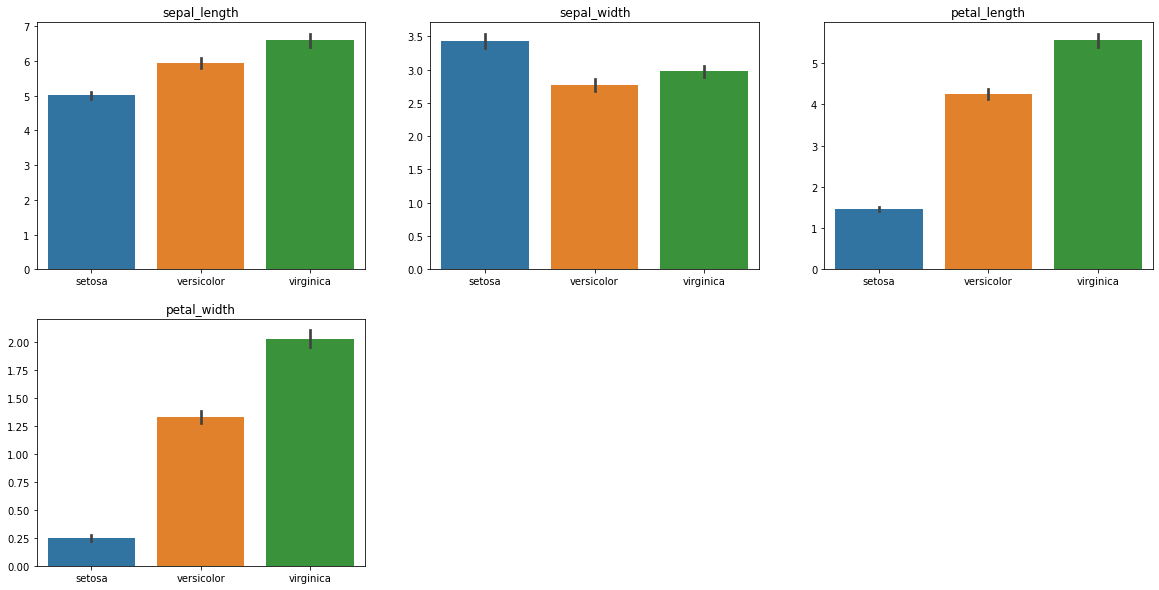

In [10]:
import math

def amplt(df,var_list,xvar,kolm = 3):
    rows = math.ceil(len(var_list)/kolm)
    fig, axs = plt.subplots(rows, kolm, figsize=(20,5*rows))

    for i, ax in zip(var_list,axs.flat):
        g = sns.barplot(data=df,x=xvar,y=i,ax=ax)
        ax.set(xlabel="",ylabel="",title=i)


    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    plt.show()
    
xvar = "species"
var_list = """sepal_length
                sepal_width
                petal_length
                petal_width""".split()
amplt(iris,var_list,xvar,kolm = 3)